In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models,fitting
import pandas as pd
rng = np.random.default_rng(seed=24351)

In [2]:
wl = 1600
noise_level = 0.2

In [3]:
#g0 = models.Gaussian1D(amplitude=5,mean=wl,stddev=100)
g1 = models.Gaussian1D(amplitude=5,mean=wl+50,stddev=50)
g2 = models.Gaussian1D(amplitude=2,mean=wl-150,stddev=130)
g3 = models.Gaussian1D(amplitude=1.5,mean=wl+150,stddev=160)
g4 = models.Gaussian1D(amplitude=2.5,mean=wl-50,stddev=80)

In [4]:
x = np.arange(1000,2500,1)
y = g1(x)+g2(x)+g3(x)+g4(x)+rng.normal(0.,noise_level,x.shape)+rng.uniform(-noise_level,noise_level,x.shape)
base = pd.DataFrame({'Wavelength':x,'Flux':y})

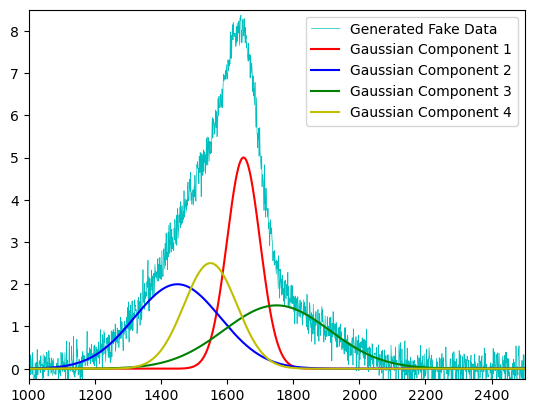

In [5]:
plt.plot(x,y,lw=0.5,color='c',label='Generated Fake Data')
#plt.plot(x,g0(x),color='black',label='Main Gaussian Component')
plt.plot(x,g1(x),color='r',label='Gaussian Component 1')
plt.plot(x,g2(x),color='b',label='Gaussian Component 2')
plt.plot(x,g3(x),color='g',label='Gaussian Component 3')
plt.plot(x,g4(x),color='y',label='Gaussian Component 4')
plt.xlim(1000,2500)
plt.ylim(-0.25,8.5)
plt.legend()
plt.savefig('base.png',dpi=300,transparent=True)

In [6]:
noise_level_high = 1.35
y_high_noise = g1(x)+g2(x)+g3(x)+g4(x)+rng.normal(0.,noise_level_high,x.shape)+rng.uniform(-noise_level_high,noise_level_high,x.shape)
high_noise = pd.DataFrame({'Wavelength':x,'Flux':y_high_noise})

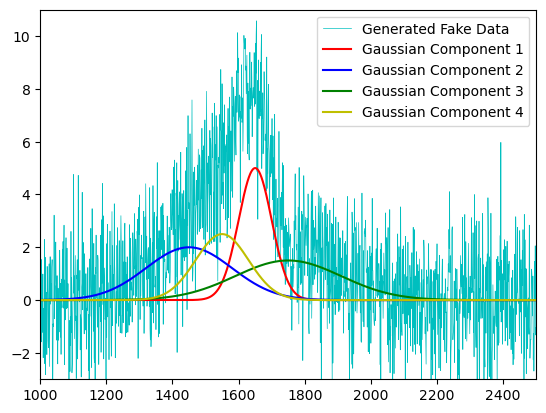

In [7]:
plt.plot(x,y_high_noise,lw=0.5,color='c',label='Generated Fake Data')
#plt.plot(x,g0(x),color='black',label='Main Gaussian Component')
plt.plot(x,g1(x),color='r',label='Gaussian Component 1')
plt.plot(x,g2(x),color='b',label='Gaussian Component 2')
plt.plot(x,g3(x),color='g',label='Gaussian Component 3')
plt.plot(x,g4(x),color='y',label='Gaussian Component 4')
plt.xlim(1000,2500)
plt.ylim(-3,11)
plt.legend()
plt.savefig('hign_noise.png',dpi=300,transparent=True)

In [8]:
tr1 = models.Trapezoid1D(amplitude=0.5,x_0=wl-150,width=50,slope=0.027)
tr2 = models.Trapezoid1D(amplitude=0.8,x_0=wl+150,width=150,slope=0.015)

In [9]:
y_more_components = g1(x)+g4(x)+tr1(x)+tr2(x)+ \
                    rng.normal(0.,noise_level,x.shape)+rng.uniform(-noise_level,noise_level,x.shape)
more_components = pd.DataFrame({'Wavelength':x,'Flux':y_more_components})

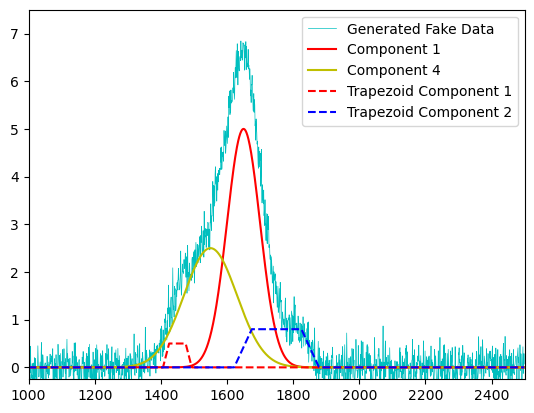

In [10]:
plt.plot(x,y_more_components,lw=0.5,color='c',label='Generated Fake Data')
#plt.plot(x,g0(x),color='black',label='Main Gaussian Component')
plt.plot(x,g1(x),color='r',label='Component 1')
#plt.plot(x,g2(x),color='b',label='Component 2')
#plt.plot(x,g3(x),color='g',label='Component 3')
plt.plot(x,g4(x),color='y',label='Component 4')
plt.plot(x,tr1(x),'--',color='r',label='Trapezoid Component 1')
plt.plot(x,tr2(x),'--',color='b',label='Trapezoid Component 2')
plt.xlim(1000,2500)
plt.ylim(-0.25,7.5)
plt.legend()
plt.savefig('more_components.png',dpi=300,transparent=True)

In [11]:
base.to_csv('base_data.csv')
high_noise.to_csv('hign_noise_data.csv')
more_components.to_csv('more_components_data.csv')